In [216]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

from scipy import stats

import numpy as np

import sklearn
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
import random
random.seed(42)

In [20]:
q1_cent = pd.read_csv("./base/agrup_centroides_Q1.csv")

In [21]:
q1_agrup = pd.read_csv("./base/agrupamento_Q1.csv")

In [22]:
q1_cent.head()

,Unnamed: 0,X1,X2,X3,X4
0,1,1.488531,-0.430586,0.208942,0.018485
1,2,0.149391,1.549535,0.219688,0.917854
2,3,1.276714,0.844500,1.211906,-0.494781
3,4,-0.224172,-0.265252,1.004367,-0.209741
4,5,0.059576,0.946101,1.114006,0.401051


In [23]:
q1_agrup.head()

,X1,X2,X3,X4
0,-0.075701,0.470857,0.133139,-0.152900
1,-0.328561,0.427323,-0.181237,-0.173041
2,-0.470727,-0.150515,0.000954,0.070937
3,-0.280037,-0.250587,-0.216587,-0.372430
4,-0.139359,-0.124966,0.081284,0.083914


In [24]:
filtered = [f'X{i}' for i in range(1, 4)]

In [25]:
X_cent = q1_cent[filtered]

In [26]:
X_cent = X_cent.as_matrix()

In [27]:
X_agrup = q1_agrup[filtered]

In [28]:
X_agrup = X_agrup.as_matrix()

In [61]:
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=10).fit(X_cent[:5:])

In [62]:
kmeans.labels_

array([2, 3, 4, 1, 0], dtype=int32)

In [65]:
kmeans.cluster_centers_

array([[ 0.05957565,  0.94610149,  1.11400584],
       [-0.22417162, -0.26525233,  1.00436711],
       [ 1.4885313 , -0.43058596,  0.20894176],
       [ 0.14939142,  1.54953478,  0.21968763],
       [ 1.27671379,  0.84449994,  1.21190625]])

In [63]:
[print((v[0]**2+v[1]**2+v[2]**2)**0.5) for v in kmeans.cluster_centers_]

1.4627598225542826
1.0627158646561072
1.5635812584941613
1.5721445515446795
1.9524074905390612


[None, None, None, None, None]

In [43]:
kmeans.predict(X_agrup)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,
        8, 11,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
       11,  8,  8,  8,  8

In [3]:
q1.head()

,X1,X2,X3,X4
1,1.488531,-0.430586,0.208942,0.018485
2,0.149391,1.549535,0.219688,0.917854
3,1.276714,0.844500,1.211906,-0.494781
4,-0.224172,-0.265252,1.004367,-0.209741
5,0.059576,0.946101,1.114006,0.401051


<IPython.core.display.Javascript object>


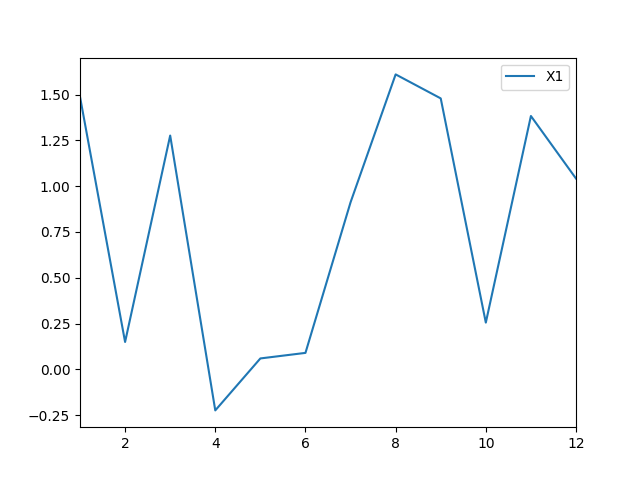

In [4]:
q1[['X1']].plot.line()

<IPython.core.display.Javascript object>


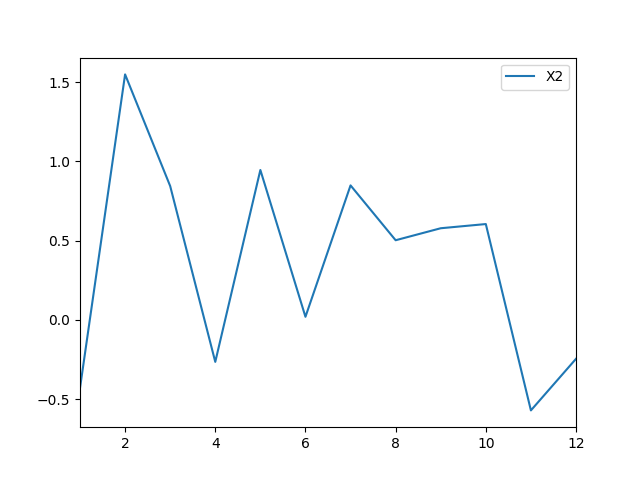

In [5]:
q1[['X2']].plot.line()

<IPython.core.display.Javascript object>


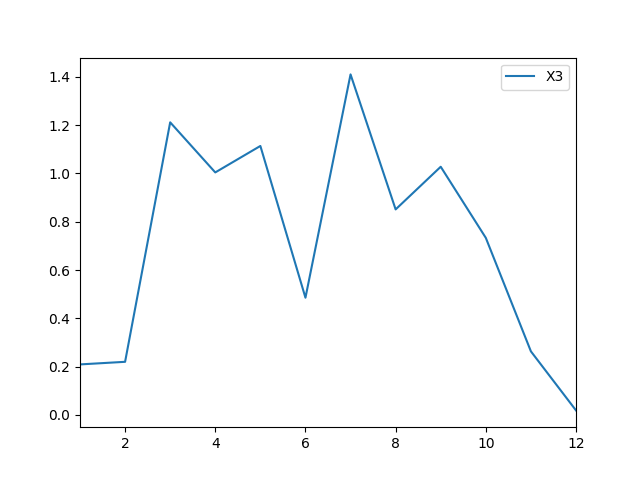

In [6]:
q1[['X3']].plot.line()

<IPython.core.display.Javascript object>


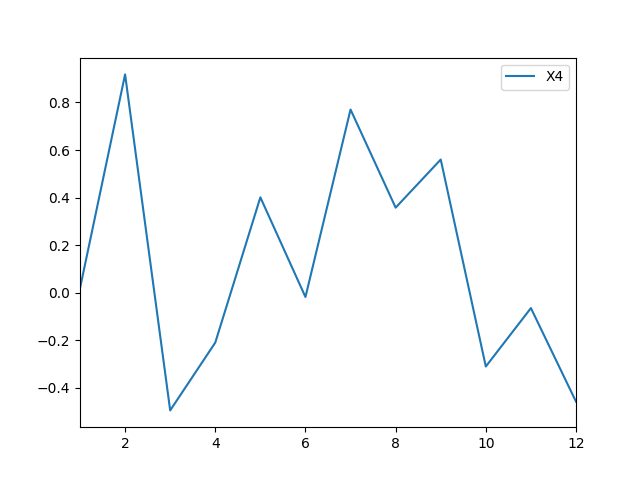

In [7]:
q1[['X4']].plot.line()

In [8]:
q1.mean()

X1    0.793539
X2    0.365068
X3    0.712356
X4    0.122490
dtype: float64

In [9]:
q1.median()

X1    0.976955
X2    0.540485
X3    0.792165
X4    0.000220
dtype: float64

In [10]:
q1.std()

X1    0.677734
X2    0.655521
X3    0.460627
X4    0.472638
dtype: float64

In [11]:
q1.max()

X1    1.610552
X2    1.549535
X3    1.410461
X4    0.917854
dtype: float64

In [12]:
q1.min()

X1   -0.224172
X2   -0.571543
X3    0.018402
X4   -0.494781
dtype: float64

<IPython.core.display.Javascript object>


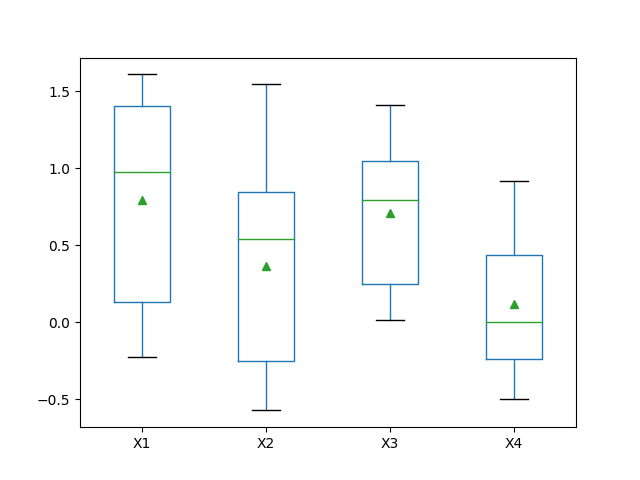

In [13]:
q1.plot.box(showmeans=True)

In [66]:
q3 = pd.read_csv("./base/classificacao_Q3.csv")

In [67]:
q3.head()

,Genero,Idade,Escolaridade,Profissao,Target
0,F,a - Ate 25 anos,Fundamental,b,0
1,M,a - Ate 25 anos,Medio,d,1
2,F,c - 36 a 45 anos,Fundamental,a,1
3,M,d - 46 a 55 anos,Fundamental,a,0
4,F,c - 36 a 45 anos,Fundamental,b,1


In [68]:
X = q3[['Genero', 'Idade', 'Escolaridade', 'Profissao']]

In [69]:
le = preprocessing.LabelEncoder()
le.fit(X[['Genero']].as_matrix())

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [70]:
X[['Genero']] = X[['Genero']].apply(le.transform)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [71]:
le = preprocessing.LabelEncoder()
le.fit(X[['Idade']].as_matrix())

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [72]:
X[['Idade']] = X[['Idade']].apply(le.transform)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [73]:
le = preprocessing.LabelEncoder()
le.fit(X[['Escolaridade']].as_matrix())

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [74]:
X[['Escolaridade']] = X[['Escolaridade']].apply(le.transform)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [75]:
le = preprocessing.LabelEncoder()
le.fit(X[['Profissao']].as_matrix())

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [76]:
X[['Profissao']] = X[['Profissao']].apply(le.transform)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [77]:
y = q3[['Target']]

In [78]:
X = X.as_matrix()

In [79]:
y = y.as_matrix()

In [90]:
gnb = GaussianNB()

In [91]:
gnb.fit(X[:500:], y[:500:])

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [92]:
predictions = gnb.predict(X[:500:])

In [88]:
print("Accuracy score", sklearn.metrics.accuracy_score(y[500::], predictions))

Accuracy score 0.696


In [83]:
gnb.score(X[500::], y[500::])

0.762

In [85]:
predictions = gnb.predict(X[500::])

In [86]:
print("Accuracy score", sklearn.metrics.accuracy_score(y[500::], predictions))

Accuracy score 0.762


In [293]:
kf = KFold(n_splits=2, random_state=2, shuffle=True)

In [294]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [295]:
clf = SVC(C=1.0, probability=True)

In [296]:
clf.fit(X, y)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [297]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes=[],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if len(classes):
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

# plt.show()

In [298]:
clf.score(X_test, y_test)

0.806

In [299]:
y_predict = clf.predict(X_test)

In [300]:
confusion_matrix(y_test, y_predict)

array([[ 21,  80],
       [ 17, 382]])

<IPython.core.display.Javascript object>


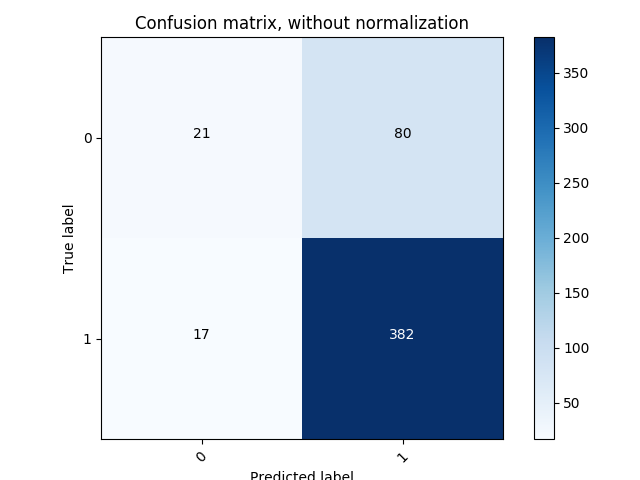

Confusion matrix, without normalization
[[ 21  80]
 [ 17 382]]


<IPython.core.display.Javascript object>


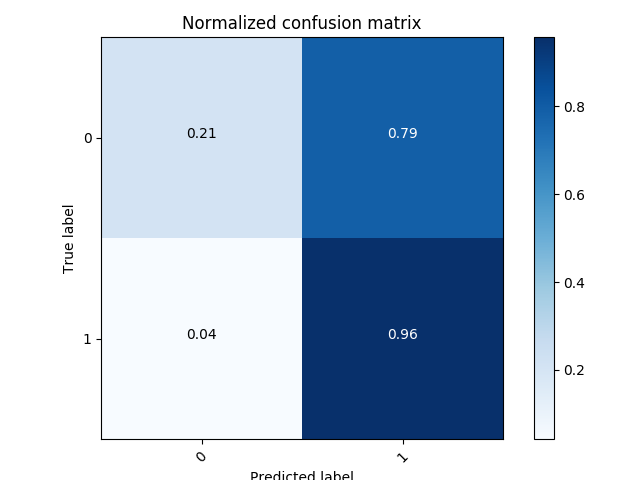

Normalized confusion matrix
[[0.21 0.79]
 [0.04 0.96]]


In [301]:
cnf_matrix = confusion_matrix(y_test, y_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [94]:
q4 = pd.read_csv("./base/classificacao_Q4.csv")

In [95]:
q4.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.696199,-0.792598,-0.349427,-0.464560,3.187014,0.035976,1.033274,-1.504968,0.204693,1.691204,...,1.488142,-0.686337,2.084970,-0.685140,-2.049451,2.015426,1.158477,-0.309441,-1.549833,4.0
1,-0.236696,-2.202342,0.024023,1.497700,-0.069758,-2.467088,1.126529,-0.570557,2.079251,-1.882632,...,0.405567,0.509564,1.374071,-0.016943,-0.429280,-0.895016,1.259566,-0.354139,0.806797,5.0
2,-0.436683,1.563816,-0.895999,-0.580425,0.311060,-0.187369,0.805249,-2.399522,-0.578818,1.586981,...,0.933578,-1.285978,0.503162,0.204829,-0.753835,0.290033,1.721487,1.304518,0.478903,3.0
3,1.425908,0.400055,-0.305038,-0.930251,-2.214549,1.763379,-0.239868,-2.058891,-1.006533,-2.156839,...,-0.849927,1.402768,0.393653,-1.466818,0.152257,-4.004950,0.676342,-1.927319,1.959032,8.0
4,-0.186156,-0.975764,0.594660,-1.181980,-1.443414,-0.797651,-1.252608,-0.060452,0.130702,-2.343517,...,-1.444435,-1.818126,0.446574,0.239328,0.802939,-2.035289,-1.433793,-0.218596,0.619317,9.0


In [96]:
filtered = [f"x{i}" for i in range(100)]
X = q4[filtered]

In [97]:
y = q4[['target']]

In [98]:
X = X.as_matrix()

In [99]:
y = y.as_matrix()

In [106]:
kf = KFold(n_splits=10)

In [107]:
bases = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    V = []
    V.extend(X_train)
    V.extend(X_test)
    L = []
    L.extend(y_train)
    L.extend(y_test)
    bases.append([V, L])

In [122]:
X_train = []
y_train = []
X_test = []
y_test = []

for base in bases:
    X_train.append(base[0][:150:])
    y_train.append(base[1][:150:])
    X_test.append(base[0][150::])
    y_test.append(base[1][150::])

In [131]:
knbrs = KNeighborsClassifier(n_neighbors =15, metric='euclidean')

In [132]:
knbrs.fit(X_train[0], y_train[0])

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [136]:
knbrs.score(X_train[0], y_train[0])

0.5466666666666666

In [137]:
predictions = knbrs.predict(X_train[0])

In [138]:
print("Accuracy score", sklearn.metrics.accuracy_score(y_train[0], predictions))

Accuracy score 0.5466666666666666


In [141]:
accuracy = []
for _X_train, _y_train, _X_test, _y_test in zip(X_train, y_train, X_test, y_test):
    knbrs = KNeighborsClassifier(n_neighbors =15, metric='euclidean')
    knbrs.fit(_X_train, _y_train)
    knbrs.score(_X_train, _y_train)
    predictions = knbrs.predict(_X_test)
    accuracy.append(sklearn.metrics.accuracy_score(_y_test, predictions))
    print("Accuracy score", sklearn.metrics.accuracy_score(_y_test, predictions))

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy score 0.44666666666666666
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924
Accuracy score 0.49925925925925924


In [142]:
sum(accuracy)/10

0.49399999999999994

In [311]:
clf = SVC(C=1.0, probability=True, cache_size=1000, tol=1e-14)

In [312]:
clf.fit(X_train, y_train)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-14, verbose=False)

In [313]:
clf.score(X_test, y_test)

0.692

In [314]:
y_predict = clf.predict(X_test)

In [315]:
confusion_matrix(y_test, y_predict)

array([[53,  0,  1,  0,  0,  3,  0,  5,  2,  3],
       [ 0, 52,  3,  2, 14,  1,  2,  0,  3,  8],
       [ 3,  6, 47,  2,  0,  4,  2,  1,  4,  3],
       [ 0,  5,  5, 55, 11,  0,  0,  0,  0,  5],
       [ 0,  4,  0,  3, 61,  0,  0,  1,  0, 13],
       [ 5,  5,  7,  0,  0, 46,  3,  9,  2,  0],
       [ 0,  0,  9,  0,  6,  0, 50,  9,  1,  0],
       [ 9,  1,  6,  4,  0,  2,  2, 50,  2,  0],
       [ 4,  0,  2,  0,  0,  0,  8,  2, 53,  0],
       [ 1,  1,  1,  5,  1,  4,  0,  1,  0, 52]])

<IPython.core.display.Javascript object>


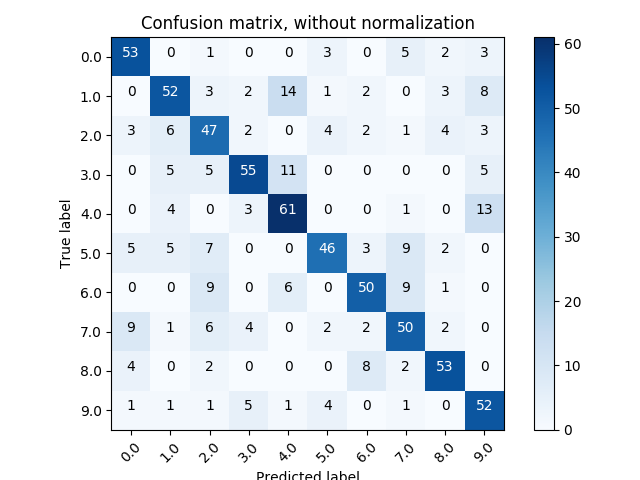

Confusion matrix, without normalization
[[53  0  1  0  0  3  0  5  2  3]
 [ 0 52  3  2 14  1  2  0  3  8]
 [ 3  6 47  2  0  4  2  1  4  3]
 [ 0  5  5 55 11  0  0  0  0  5]
 [ 0  4  0  3 61  0  0  1  0 13]
 [ 5  5  7  0  0 46  3  9  2  0]
 [ 0  0  9  0  6  0 50  9  1  0]
 [ 9  1  6  4  0  2  2 50  2  0]
 [ 4  0  2  0  0  0  8  2 53  0]
 [ 1  1  1  5  1  4  0  1  0 52]]


<IPython.core.display.Javascript object>


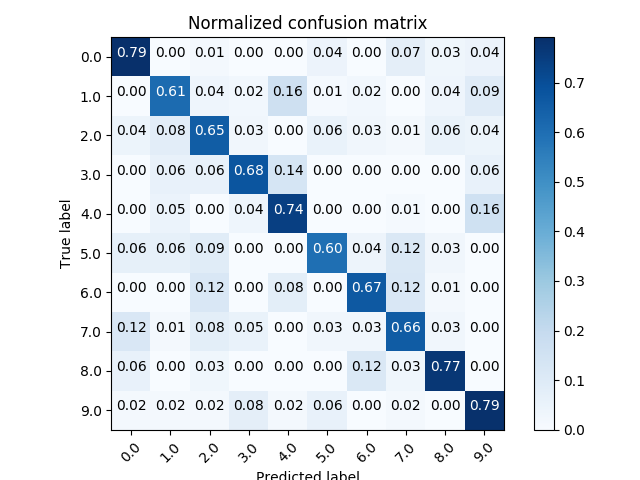

Normalized confusion matrix
[[0.79 0.   0.01 0.   0.   0.04 0.   0.07 0.03 0.04]
 [0.   0.61 0.04 0.02 0.16 0.01 0.02 0.   0.04 0.09]
 [0.04 0.08 0.65 0.03 0.   0.06 0.03 0.01 0.06 0.04]
 [0.   0.06 0.06 0.68 0.14 0.   0.   0.   0.   0.06]
 [0.   0.05 0.   0.04 0.74 0.   0.   0.01 0.   0.16]
 [0.06 0.06 0.09 0.   0.   0.6  0.04 0.12 0.03 0.  ]
 [0.   0.   0.12 0.   0.08 0.   0.67 0.12 0.01 0.  ]
 [0.12 0.01 0.08 0.05 0.   0.03 0.03 0.66 0.03 0.  ]
 [0.06 0.   0.03 0.   0.   0.   0.12 0.03 0.77 0.  ]
 [0.02 0.02 0.02 0.08 0.02 0.06 0.   0.02 0.   0.79]]


In [316]:
cnf_matrix = confusion_matrix(y_test, y_predict)

classes = [f'{i}.0' for i in range(10)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [163]:
q6 = pd.read_csv("./base/regressao_Q6.csv")

In [164]:
q6.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.351837,0.719462,0.862522,-1.131049,0.744903,0.532177,1.595572,0.607174,1.306696,0.450022,170.471696
1,-0.309565,0.786033,1.175365,-1.149287,0.318301,0.620987,1.470917,0.568968,1.334661,-0.267235,151.023999
2,-1.808729,-0.581660,-0.052200,-2.411602,0.171517,-1.174627,0.010317,-0.677372,0.841643,-1.186626,-268.606299
3,-0.386627,0.991724,0.234672,-0.431101,-0.160947,0.521185,1.957080,0.651099,0.933481,1.280705,180.737656
4,-0.879158,0.106556,0.775418,-1.046543,0.097267,-0.757026,1.050900,-0.262257,1.383563,-1.152509,-38.200673


In [165]:
filtered = [f'x{i}' for i in range(10)]

In [166]:
X = q6[filtered]

In [167]:
y = q6[['target']]

In [168]:
X = X.as_matrix()

In [169]:
y = y.as_matrix()

In [170]:
loo = LeaveOneOut()

In [182]:
train = []
test = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = Ridge(alpha=1.7)
    
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train.append(mean_squared_error(y_train, y_train_pred))
    test.append(mean_squared_error(y_test, y_test_pred))
    print(f'train: {mean_squared_error(y_train, y_train_pred)}')
    print(f'test: {mean_squared_error(y_test, y_test_pred)}')
    print(end="\n\n")
    

train: 753.1919350626123
test: 0.2407610837617191


train: 753.1921503973322
test: 0.06348948496757134


train: 750.5587516651519
test: 2899.7046144972533


train: 751.5927099171436
test: 1784.9946067044777


train: 752.0471127633897
test: 1287.3198933530766


train: 753.1614650309164
test: 37.17498019111164


train: 753.0840177045591
test: 121.25272177083471


train: 750.836761039963
test: 2643.893961164807


train: 753.1820582061132
test: 10.666658026073389


train: 753.0941364060461
test: 105.8067542379055


train: 752.1166276115648
test: 1212.3396005128277


train: 751.6852812685178
test: 1666.0187152696255


train: 752.8635285432044
test: 358.32391700610395


train: 752.885197735065
test: 343.3219875028128


train: 753.1912947471097
test: 1.815611672118348


train: 752.969352897857
test: 235.00750687481494


train: 753.16167580416
test: 29.09152925836558


train: 753.133854490635
test: 66.87059126002012


train: 752.5398672647534
test: 699.6277013402151


train: 753.1838848927121


train: 751.7335167783891
test: 1585.327371994943


train: 753.0694919118193
test: 134.2559459757022


train: 753.024737070632
test: 194.46288238095633


train: 751.5030515377902
test: 1854.6671804274788


train: 752.936201848772
test: 290.5451786096876


train: 753.0953188666778
test: 109.71517070229694


train: 751.4731409510147
test: 1938.4525909938893


train: 752.9243732158176
test: 302.43833904436707


train: 753.1607492438269
test: 32.607640009502646


train: 749.7354381824293
test: 3870.5403108533405


train: 753.1321806778241
test: 62.90907427697995


train: 752.8889147081676
test: 328.5758636488132


train: 752.5291722032604
test: 725.0693399915957


train: 752.7412540599556
test: 502.6535602632412


train: 753.1455594495629
test: 51.60078876224304


train: 752.4895176087284
test: 781.6775327908879


train: 751.6567978563867
test: 1695.7169134954152


train: 752.1515111314092
test: 1167.6658529731674


train: 753.020088948527
test: 182.55412466900626


train: 753.1742276623604

train: 753.1699626444865
test: 27.941577364456077


train: 753.1922515509129
test: 0.37756750653861765


train: 752.6415297717692
test: 601.0210216721758


train: 753.1826549673708
test: 12.016989098562485


train: 752.6408340139417
test: 638.2276393994434


train: 753.1325430635654
test: 72.38374098250341


train: 753.1888038209655
test: 4.644047252037259


train: 751.992009756453
test: 1397.5137040955349


train: 753.1622948379517
test: 35.28847157472098


train: 752.760853612739
test: 480.60942402702824


train: 752.6840659176448
test: 577.5694352977814


train: 752.8187490953378
test: 413.0300694225295


train: 753.1907023179206
test: 1.0824192023698982


train: 752.400111371193
test: 953.5066118222719


train: 753.0373923562056
test: 167.82596033432552


train: 753.0581540522777
test: 142.65055419125196


train: 752.9578465435885
test: 260.83574187569786


train: 751.8990287474741
test: 1412.8639076403692


train: 753.177263293086
test: 19.60964369161557


train: 752.1396230438121

train: 751.266957767138
test: 2175.4740017526474


train: 753.0410336637293
test: 166.52731551505917


train: 753.1125329833179
test: 82.44184403019035


train: 751.9039455169229
test: 1420.1565701440356


train: 752.9620275166561
test: 247.22127248041525


train: 748.9937793117451
test: 4636.642350735002


train: 752.5976872558954
test: 653.9391748741858


train: 753.1670590295512
test: 24.799954293837647


train: 750.8913518536554
test: 2500.0520037500996


train: 752.2875658778632
test: 1025.7795369469761


train: 752.9708845483735
test: 239.59174907740845


train: 753.1728835385449
test: 16.92387017364488


train: 752.866397189259
test: 380.0264357910285


train: 753.0384540924719
test: 173.87099937374157


train: 752.8973186830361
test: 318.31140811950644


train: 752.5684683808113
test: 692.7736218536678


train: 753.046933627519
test: 154.45513951066562


train: 752.7658129237957
test: 476.509163834158


train: 751.6646980902772
test: 1695.0550662007238


train: 753.116629687208

train: 753.0603079935862
test: 151.3108926441008


train: 752.4590538238881
test: 806.6090630417954


train: 753.1906565795127
test: 1.523001667000796


train: 752.9518532321051
test: 264.43911198663756


train: 748.7428239177148
test: 4895.68887492371


train: 749.9779877542072
test: 3566.9160472550516


train: 752.773409544139
test: 443.02364628721955


train: 753.1914340771798
test: 0.7301036077916383


train: 749.0784762862489
test: 4611.814539216939


train: 753.0405389660716
test: 162.8665722834803


train: 753.1801699496334
test: 15.127118694011205


train: 752.1598478661616
test: 1134.6242794539266


train: 752.7514714131531
test: 513.8987280351386


train: 750.5058147733473
test: 2973.720962565163


train: 750.3490040781215
test: 3175.8517985218814


train: 753.1922021010402
test: 0.3405700031785317


train: 752.5405889503712
test: 720.4976295000193


train: 752.6470891308687
test: 595.2814499128986


train: 752.6104736610486
test: 637.1016053939446


train: 753.0687419467182


test: 251.16953603464344


train: 752.168942040903
test: 1148.8661457924295


train: 753.1554844531198
test: 44.21963153660381


train: 753.0759691304817
test: 119.30516092717266


train: 752.933952124065
test: 294.59567880038855


train: 745.7599451549655
test: 8237.58166520568


train: 753.0324640978637
test: 172.58816634875953


train: 752.834188892059
test: 404.3137059452304


train: 752.7593253695843
test: 483.1743233743413


train: 752.9321447171156
test: 286.61554804200966


train: 753.1793921264185
test: 16.03236983864606


train: 753.117373862354
test: 81.12563924676307


train: 753.1855860495998
test: 5.976707049037168


train: 751.7166006963006
test: 1599.155371026652


train: 753.0700139022964
test: 129.51577492390243


train: 752.6063522776806
test: 646.9028606988242


train: 751.4786090504815
test: 1875.0599357454778


train: 753.1748399858889
test: 17.32312295964475


train: 753.1922323787234
test: 0.08537823116894043


train: 752.0523688755471
test: 1272.8647978776103



train: 753.1847643599721
test: 7.6050483463048275


train: 752.2947834773191
test: 981.8097821730785


train: 753.1414442769927
test: 49.99165803780585


train: 752.8960186864472
test: 319.95877326577124


train: 752.5769114605504
test: 687.7040672273163


train: 753.1911544232103
test: 0.9937302401155808


train: 753.1642572834284
test: 34.947301185232945


train: 753.18125872813
test: 14.63699950740569


train: 753.1912479845456
test: 2.4042568108334885


train: 752.2538039284311
test: 1062.7765698711012


train: 752.5150388304747
test: 747.9478213669576


train: 752.7875707928173
test: 427.67035916610826


train: 751.675857579097
test: 1697.3506592378353


train: 753.1557569697864
test: 40.558659060092886


train: 752.5023099090902
test: 791.2908405085874


train: 752.238290327083
test: 1019.1255161213129


train: 752.8573760781297
test: 385.3301592191838


train: 753.1849548244677
test: 7.561012044567397


train: 752.5940381493388
test: 639.906196498327


train: 752.3823215766781
t

In [183]:
sum(train)/len(train)

752.5007813280812

In [184]:
sum(test)/len(test)

767.33524397265

In [188]:
kf = KFold(n_splits=10)

In [189]:
train = []
test = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = ExtraTreesRegressor()
    
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train.append(mean_absolute_error(y_train, y_train_pred))
    test.append(mean_absolute_error(y_test, y_test_pred))
    print(f'train: {mean_absolute_error(y_train, y_train_pred)}')
    print(f'test: {mean_absolute_error(y_test, y_test_pred)}')
    print(end="\n\n")
    

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array 

train: 3.62499592632799e-14
test: 38.81283158880986


train: 3.6956464824405e-14
test: 37.73199995717198


train: 3.619074736863323e-14
test: 37.65182779923113


train: 3.7615421439828987e-14
test: 34.618174100392544


train: 3.676436259802289e-14
test: 37.047990188786315




/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array 

train: 3.7444065805321185e-14
test: 35.19352238245622


train: 5.0041108319870577e-08
test: 37.85046707686975


train: 3.7428365681740627e-14
test: 37.984541459829394


train: 1.0008217819978286e-07
test: 34.01346793458756


train: 3.6101032376744326e-14
test: 38.32098383507197




In [190]:
sum(train)/len(train)

1.501235812700728e-08

In [191]:
sum(test)/len(test)

36.922580632320674

In [384]:
kf = KFold(n_splits=2, random_state=1, shuffle=True)

In [385]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [386]:
clf = BayesianRidge(compute_score=True)

In [387]:
clf.fit(X_train, y_train)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [388]:
clf.score(X_test, y_test)

0.9944885550258532

In [389]:
ols = LinearRegression()

In [390]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [391]:
ols.score(X_test, y_test)

0.9944856006519618

In [144]:
q7 = pd.read_csv("./base/regressao_Q7.csv")

In [145]:
q7.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,target
0,0.591690,0.591690,1.172172,-0.983677,-1.723861,-1.872732,1.070023,-0.623034,1.705102,2.643913,...,2.643913,-0.623034,2.643913,-1.191899,0.523268,1.599678,0.228014,0.636366,1.070023,183.381979
1,0.617718,0.617718,1.066885,-0.994460,-1.660279,-2.006098,0.800897,-0.150230,1.601513,2.227607,...,2.227607,-0.150230,2.227607,-1.389668,0.946524,1.427928,0.327064,0.605663,0.800897,171.166244
2,-0.091250,-0.091250,0.460780,-2.076651,-2.903264,-3.110400,-0.361113,-2.029327,0.320967,1.514848,...,1.514848,-2.029327,1.514848,-2.855408,-0.856214,0.329120,-1.001805,-0.826144,-0.361113,-310.459284
3,-0.264834,-0.264834,1.061765,-0.539020,-0.972137,-1.102153,1.198790,-0.534910,2.272581,2.748045,...,2.748045,-0.534910,2.748045,-0.306130,1.134861,1.905080,0.998317,0.916976,1.198790,228.015980
4,0.308724,0.308724,0.793572,-1.162892,-2.315907,-2.436588,0.038154,-1.335393,1.586416,1.898164,...,1.898164,-1.335393,1.898164,-2.222185,-0.049834,0.930992,0.196569,-0.607837,0.038154,-51.379428


In [146]:
filtered = [f'x{i}' for i in range(20)]

In [147]:
X = q7[filtered]

In [148]:
y = q7[['target']]

In [149]:
X = X.as_matrix()

In [150]:
y = y.as_matrix()

In [403]:
kf = KFold(n_splits=2, random_state=1, shuffle=True)

In [404]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [405]:
clf = BayesianRidge(compute_score=True)

In [406]:
clf.fit(X_train, y_train)

/home/iury/.pyenv/versions/3.6.2/envs/lab/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [407]:
clf.score(X_test, y_test)

0.9982801561326282

In [420]:
ols = LinearRegression()

In [421]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [422]:
ols.score(X_test, y_test)

0.9982786283402133

In [212]:
a = np.array([5, 3, 3, 11, 8, 7, 1, 5, 4, 9])
b = np.array([2, 1, 1, 4, 10, 1, 1, 1, 3, 2])

In [222]:
for n, m in zip(a,b):
    print(abs(n)-abs(m))

3
2
2
7
-2
6
0
4
1
7


In [219]:
stats.kstest(b, 'norm', alternative = 'greater')

KstestResult(statistic=0.0, pvalue=1.0)